In [2]:
import pandas as pd
!pip install py7zr
import py7zr
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import SGD,Adam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 498.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.6/93.6 kB 912.2 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.2/379.2 kB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 33.6 MB/s eta 0:00:00


In [3]:
with py7zr.SevenZipFile('/kaggle/input/statoil-iceberg-classifier-challenge/train.json.7z', mode='r') as z:
    z.extractall()
    
with py7zr.SevenZipFile('/kaggle/input/statoil-iceberg-classifier-challenge/test.json.7z', mode='r') as z1:
    z1.extractall()

In [4]:
train = pd.read_json('/kaggle/working/data/processed/train.json')
test = pd.read_json('/kaggle/working/data/processed/test.json')
train.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [5]:
import numpy as np
def get_scaled_imgs(df):
    imgs = []
    label =[]

    for i, row in df.iterrows():
        #make 75x75 image
        band_1 = np.array(row['band_1']).reshape(75, 75)
        band_2 = np.array(row['band_2']).reshape(75, 75)
        band_3 = band_1 + band_2 # plus since log(x*y) = log(x) + log(y)

        # Rescale
        a = (band_1 - band_1.mean()) / (band_1.max() - band_1.min())
        b = (band_2 - band_2.mean()) / (band_2.max() - band_2.min())
        c = (band_3 - band_3.mean()) / (band_3.max() - band_3.min())
        imgs.append(np.dstack((a, b, c)))
    return np.array(imgs)
                    

In [6]:
data=get_scaled_imgs(train)
target = np.array(train['is_iceberg'])

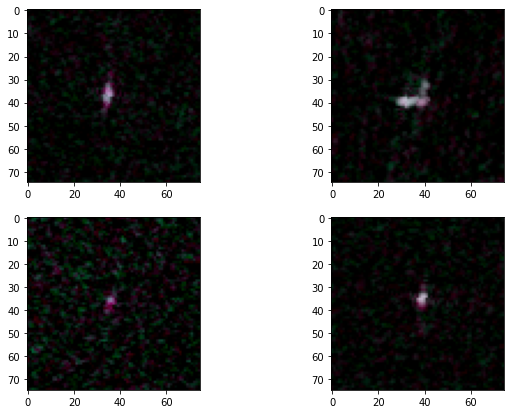

In [7]:
# create figure
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

for i in range(4):
# Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(data[i])
  


In [8]:
print(data.shape)
print(target[0:20])

(1604, 75, 75, 3)
[0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2,random_state=1)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(1283, 75, 75, 3)
(1283,)
(321, 75, 75, 3)
(321,)
[[[-0.0113155   0.11834145  0.05236127]
  [ 0.10425804  0.09274388  0.11942784]
  [-0.02106929  0.24036991  0.1076804 ]
  ...
  [-0.02118661  0.09258171  0.03241646]
  [-0.00192844  0.14257895  0.07119625]
  [-0.16280689  0.00732008 -0.10909579]]

 [[ 0.08224537 -0.27087956 -0.08080829]
  [ 0.12507859  0.00748442  0.09048268]
  [ 0.11132134  0.16605811  0.1616188 ]
  ...
  [ 0.05067076  0.11817693  0.09523195]
  [ 0.03392232  0.07929773  0.06384726]
  [-0.05201566 -0.00834081 -0.04028822]]

 [[-0.13516442 -0.05817352 -0.12325832]
  [-0.08540454  0.00748442 -0.05537499]
  [ 0.05078653  0.07945772  0.07561498]
  ...
  [-0.12222751 -0.00833616 -0.08894027]
  [-0.00192844 -0.1334083  -0.06920366]
  [-0.01143965 -0.05834034 -0.03760612]]

 ...

 [[-0.02108259  0.23035906  0.10257848]
  [-0.02108427  0.11831632  0.04557906]
  [-0.00182611 -0.07598326 -0.03991955]
  ...
  [ 0.08210956  0.10551249  0.11057533]
  [ 0.11118704  0.09255647  0.1241

In [11]:
model=Sequential()

    # CNN 1
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.2))

    # CNN 2
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

    # CNN 3
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

    # CNN 4
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

    # You must flatten the data for the dense layers
model.add(Flatten())

    # Dense 1
model.add(Dense(512, activation='relu',input_shape=(257,)))
model.add(Dropout(0.2))

    # Dense 2
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

    # Output
model.add(Dense(1, activation="sigmoid"))

# Final model
optimizer = Adam(lr=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()



2022-12-22 17:49:21.543288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 17:49:21.651170: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 17:49:21.652069: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-22 17:49:21.654390: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       1

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
import keras
file_path = "weights_best.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(file_path, monitor="val_accuracy", save_best_only=True, mode='max')
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.9, patience=2, min_lr=1e-6, mode="max", verbose=True)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, mode="max", verbose=True)
callbacks_list = [checkpoint, reduce_lr, early_stopping]

In [13]:
history=model.fit(x_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.2,callbacks=callbacks_list)

2022-12-22 17:49:24.548581: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-22 17:49:26.045461: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


103/103 [==============================] - 8s 12ms/step - loss: 0.6910 - accuracy: 0.5234 - val_loss: 0.6859 - val_accuracy: 0.5447
Epoch 2/100
103/103 [==============================] - 1s 6ms/step - loss: 0.6669 - accuracy: 0.5370 - val_loss: 0.6321 - val_accuracy: 0.6265
Epoch 3/100
103/103 [==============================] - 1s 6ms/step - loss: 0.5856 - accuracy: 0.6725 - val_loss: 0.5443 - val_accuracy: 0.7276
Epoch 4/100
103/103 [==============================] - 1s 6ms/step - loss: 0.5023 - accuracy: 0.7388 - val_loss: 0.5198 - val_accuracy: 0.7354
Epoch 5/100
103/103 [==============================] - 1s 6ms/step - loss: 0.4256 - accuracy: 0.7982 - val_loss: 0.4027 - val_accuracy: 0.8132
Epoch 6/100
103/103 [==============================] - 1s 6ms/step - loss: 0.3833 - accuracy: 0.8187 - val_loss: 0.5221 - val_accuracy: 0.6809
Epoch 7/100
103/103 [==============================] - 1s 6ms/step - loss: 0.3656 - accuracy: 0.8168 - val_loss: 0.4094 - val_accuracy: 0.7743

Epoch 000

In [14]:
file_path = "./weights_best.hdf5"
model = keras.models.load_model(file_path)

In [15]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss:",score[0])
print("accuracy:",score[1])

Test Loss: 0.26355108618736267
accuracy: 0.8785046935081482


In [16]:
predicted=model.predict(x_test)
print(predicted[:4])


[[6.6870492e-04]
 [2.5588978e-02]
 [9.7686505e-01]
 [6.0341512e-03]]


In [17]:
df_his=pd.DataFrame.from_dict(history.history)
history.params
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

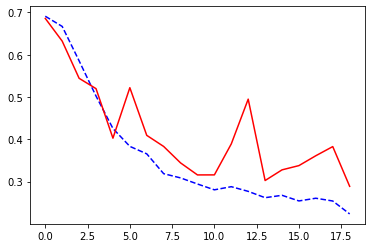

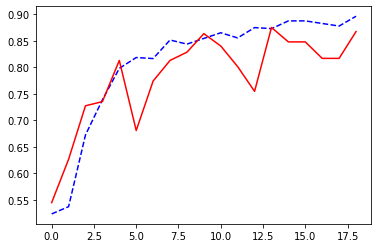

In [18]:
df_his['loss'].plot(style='b--',label='trainig')
df_his['val_loss'].plot(style='r-',label='test')
plt.show()

df_his['accuracy'].plot(style='b--',label='trainig')
df_his['val_accuracy'].plot(style='r-',label='test')
plt.show()

In [19]:
test.head()

,id,band_1,band_2,inc_angle
0,5941774d,"[-15.863251, -15.201077, -17.887735, -19.17248...","[-21.629612, -21.142353, -23.908337, -28.34524...",34.966400
1,4023181e,"[-26.058969497680664, -26.058969497680664, -26...","[-25.754207611083984, -25.754207611083984, -25...",32.615072
2,b20200e4,"[-14.14109992980957, -15.064241409301758, -17....","[-14.74563980102539, -14.590410232543945, -14....",37.505433
3,e7f018bb,"[-12.167478, -13.706167, -16.54837, -13.572674...","[-24.32222, -26.375538, -24.096739, -23.8769, ...",34.473900
4,4371c8c3,"[-23.37459373474121, -26.02718162536621, -28.1...","[-25.72234344482422, -27.011577606201172, -23....",43.918874


In [20]:
test_data=get_scaled_imgs(test)

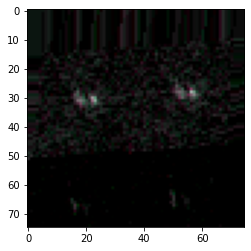

In [21]:
test_data.shape
plt.imshow(test_data[53])

In [22]:
predicted=model.predict(test_data)
print(predicted[:10])
print(predicted.shape)

2022-12-22 17:49:57.366602: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 568620000 exceeds 10% of free system memory.
2022-12-22 17:49:58.036992: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 568620000 exceeds 10% of free system memory.


[[0.43931943]
 [0.4764457 ]
 [0.08128764]
 [0.9846405 ]
 [0.5597646 ]
 [0.39834815]
 [0.03335242]
 [0.983997  ]
 [0.00179679]
 [0.01787749]]
(8424, 1)


In [23]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['is_iceberg'] = predicted.reshape((predicted.shape[0]))
submission.to_csv('iceberg.csv', index=False)

In [24]:
submission

,id,is_iceberg
0,5941774d,0.439319
1,4023181e,0.476446
2,b20200e4,0.081288
3,e7f018bb,0.984640
4,4371c8c3,0.559765
...,...,...
8419,16ee9b50,0.007229
8420,5a599eb7,0.302053
8421,df30d6dd,0.101971
8422,18af95b1,0.976026
